In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest,mutual_info_regression
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam 

In [49]:
data=pd.read_csv("D:\Excel R\Assignments\Assignment 16\gas_turbines.csv")
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [50]:
d1=data['TEY'].values
d2=pd.DataFrame(d1,columns=['TEy'])
d2

,TEy
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
...,...
15034,111.61
15035,111.78
15036,110.19
15037,110.74


In [51]:
d3=[data,d2]
d4=pd.concat(d3,axis=1)
d4

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,TEy
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311,114.72
...,...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559,111.61
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917,111.78
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912,110.19
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227,110.74


In [52]:
d5=d4.drop(['TEY'],axis=1)
d5

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEy
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559,111.61
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917,111.78
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912,110.19
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227,110.74


In [53]:
d5.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEy
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,12.102353,1.972499,68.190934,134.188464
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,1.103196,2.222206,10.470586,15.829717
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,9.904400,0.000388,27.765000,100.170000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,11.622000,0.858055,61.303500,127.985000
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,12.025000,1.390200,66.601000,133.780000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,12.578000,2.160400,73.935500,140.895000
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,15.081000,44.103000,119.890000,174.610000


In [54]:
d5.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEy
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.100705,-0.088588,-0.600006,-0.207495
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.131198,0.041614,0.256744,0.146939
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.182010,0.165505,0.143061,-0.110272
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.727152,-0.334207,-0.037299,0.717995
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.993784,-0.508259,-0.208496,0.977042
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.887238,-0.688272,-0.231636,0.891587
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.744740,0.063404,0.009888,-0.720356
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,1.000000,-0.520783,-0.169103,0.988473
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.520783,1.000000,0.316743,-0.541751
NOX,-0.600006,0.256744,0.143061,-0.037299,-0.208496,-0.231636,0.009888,-0.169103,0.316743,1.000000,-0.102631


<AxesSubplot:>

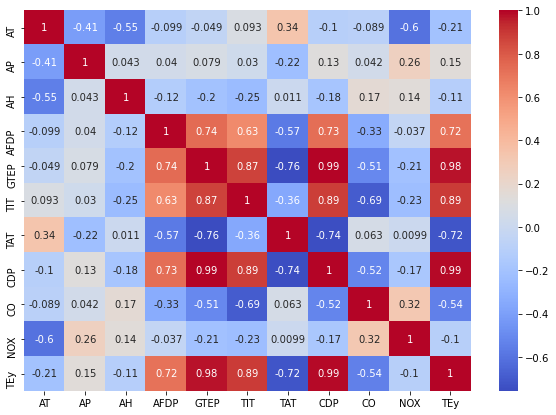

In [55]:
### Heatmap:-
plt.figure(figsize=(10,7))
sns.heatmap(d5.corr(),annot=True,cmap='coolwarm')

<Figure size 720x504 with 0 Axes>

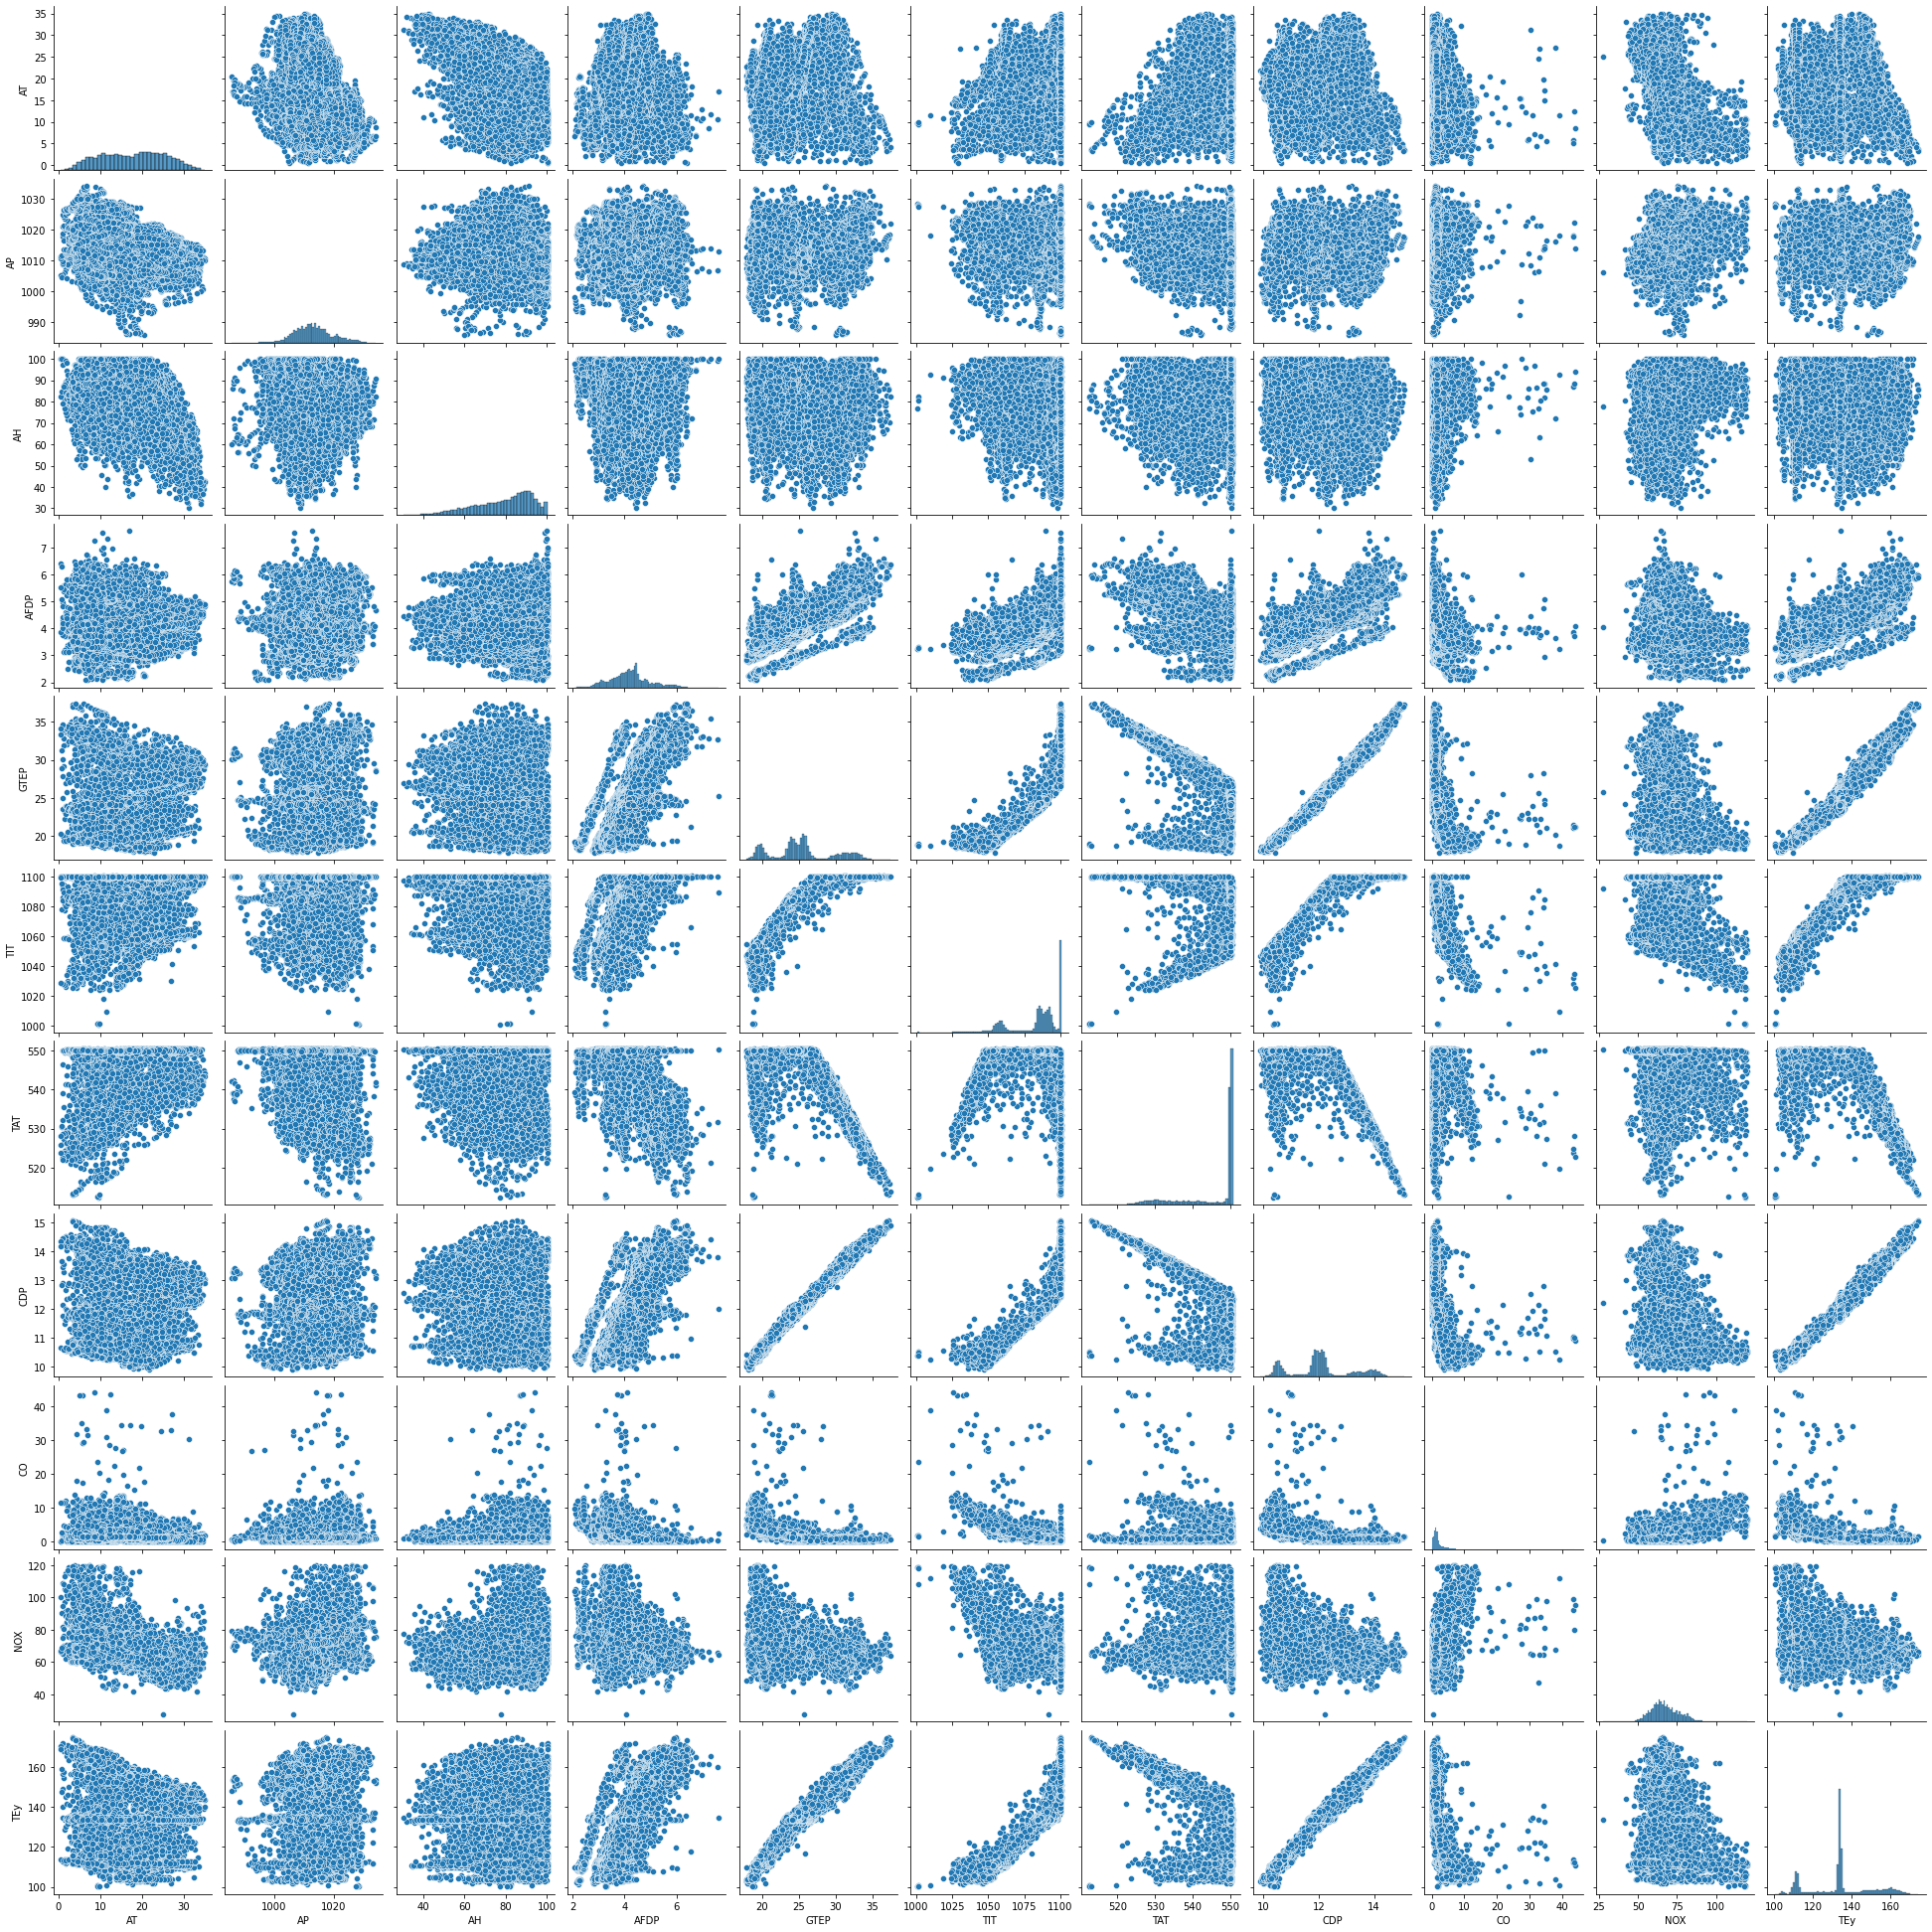

In [56]:
### Pairplot:-
plt.figure(figsize=(10,7))
sns.pairplot(d5)

In [57]:
x=d5.iloc[:,0:10]
y=d5.iloc[:,10]

In [58]:
test=SelectKBest(score_func=mutual_info_regression,k='all')
fit=test.fit(x,y)
print(fit.scores_)
features=fit.transform(x)

[0.41200175 0.1380125  0.09743507 0.66094302 1.60003551 1.32610149
 0.89380338 1.7124421  0.51278967 0.30051091]


Features 0: 0.412002
Features 1: 0.138012
Features 2: 0.097435
Features 3: 0.660943
Features 4: 1.600036
Features 5: 1.326101
Features 6: 0.893803
Features 7: 1.712442
Features 8: 0.512790
Features 9: 0.300511


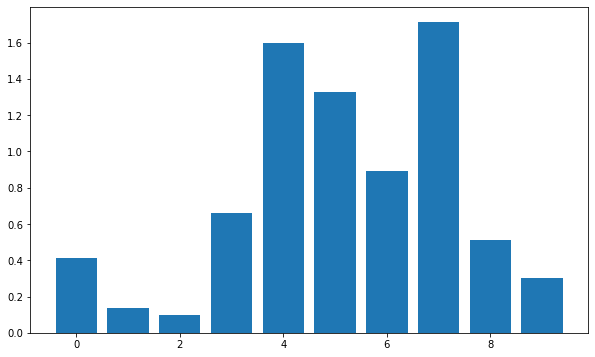

In [59]:
for i in range(len(fit.scores_)):
    print('Features %d: %f' % (i, fit.scores_[i]))
    
### Plotting the scores:-
fig,ax=plt.subplots(figsize=(10,6))
plt.bar([i for i in range(len(fit.scores_))],fit.scores_)
plt.show()

### Here we will consider only the values having a decent score:-

In [60]:
scaler=StandardScaler()
d=scaler.fit_transform(d5)
d6=pd.DataFrame(d,columns=d5.columns)
d6

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEy
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012,1.387845,-1.231172
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733,1.393002,-1.229909
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938,1.363586,-1.230541
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933,1.382878,-1.229909
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.350985,0.574179,1.348591,-1.229909
...,...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.543161,1.145792,1.085751,-1.426381
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247,1.293578,1.119943,-1.415642
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922,2.695925,2.170062,-1.516089
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598,1.924683,2.391165,-1.481343


In [61]:
X=d6.iloc[:,3:8]
Y=d6.iloc[:,10]

In [62]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=0)

In [63]:
print('Shape of x_train:',x_train.shape)
print('Shape of x_test:',x_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of x_train: (10076, 5)
Shape of x_test: (4963, 5)
Shape of y_train: (10076,)
Shape of y_test: (4963,)


In [64]:
### Creation of the model:-
model=Sequential()
model.add(Dense(10, input_dim=5, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(6, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(1,kernel_initializer='he_uniform',activation='sigmoid'))

In [65]:
### Compilation of the model:-
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [66]:
### Fiiting of the model:-
model.fit(x_train,y_train,epochs=100, batch_size=50)

Epoch 1/100
202/202 [==============================] - 0s 698us/step - loss: 0.8123 - mse: 0.8123
Epoch 2/100
202/202 [==============================] - 0s 707us/step - loss: 0.5907 - mse: 0.5907
Epoch 3/100
202/202 [==============================] - 0s 703us/step - loss: 0.5633 - mse: 0.5633
Epoch 4/100
202/202 [==============================] - 0s 836us/step - loss: 0.5572 - mse: 0.5572
Epoch 5/100
202/202 [==============================] - 0s 862us/step - loss: 0.5550 - mse: 0.5550
Epoch 6/100
202/202 [==============================] - 0s 822us/step - loss: 0.5539 - mse: 0.5539
Epoch 7/100
202/202 [==============================] - 0s 800us/step - loss: 0.5533 - mse: 0.5533
Epoch 8/100
202/202 [==============================] - 0s 772us/step - loss: 0.5528 - mse: 0.5528
Epoch 9/100
202/202 [==============================] - 0s 846us/step - loss: 0.5524 - mse: 0.5524
Epoch 10/100
202/202 [==============================] - 0s 717us/step - loss: 0.5521 - mse: 0.5521
Epoch 11/100
202/20

In [67]:
### Evaluation of  the model:-
scores=model.evaluate(x_test,y_test)
print(model.metrics_names[1])

156/156 [==============================] - 0s 638us/step - loss: 0.5795 - mse: 0.5795
mse


## Artificial Neural Network Model:- Tuning of all Hyperparameters:-

In [68]:
X1=d6.iloc[750:1000,3:8]
Y1=d6.iloc[750:1000,10]

In [69]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X1,Y1,test_size=0.2,random_state=1)

In [72]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 5,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'linear'))
    
    adam=Adam(learning_rate = learning_rate)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse'])
    return model

# Creation of the model:-
model = KerasClassifier(build_fn = create_model,verbose = 0)

# Defining of the grid search parameters:-
batch_size = [20,40]
epochs = [50,100]
learning_rate = [0.01,0.1]
dropout_rate = [0.1,0.2]
activation_function = ['relu','linear']
init = ['uniform','normal']
neuron1 = [4,8]
neuron2 = [2,4]

# Making the dictionary of the grid search parameters:-
param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Building and fitting of the GridSearchCV:-
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10, scoring='neg_mean_squared_error')
grid_result = grid.fit(x1_train, y1_train)

# Summarizing the results:-
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))


<ipython-input-72-17a43fd60d57>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.2s
[CV 2/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.5s
[CV 3/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.5s


#### Best:- -6.653.056642797814, using {'activation_function': 'relu', 'batch_size': 20, 'droput_rate': 0.1, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.1, 'neuron1': 4, 'neuron2': 2}

In [75]:
### Creation of the model:-
final_model=Sequential()
final_model.add(Dense(4, input_dim=5, kernel_initializer='uniform', activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(2, input_dim=4, kernel_initializer='uniform', activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(1, activation='linear'))

adam=Adam(learning_rate=0.01)

In [76]:
### Compilation of the model:-
final_model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mse'])

In [77]:
### Fitting the model:-
final_model.fit(x1_train,y1_train,epochs=50, batch_size=20)

Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 2.1101 - mse: 2.1101
Epoch 2/50
10/10 [==============================] - 0s 1ms/step - loss: 1.9720 - mse: 1.9720
Epoch 3/50
10/10 [==============================] - 0s 1ms/step - loss: 1.8654 - mse: 1.8654
Epoch 4/50
10/10 [==============================] - 0s 1ms/step - loss: 1.7757 - mse: 1.7757
Epoch 5/50
10/10 [==============================] - 0s 1ms/step - loss: 1.7065 - mse: 1.7065
Epoch 6/50
10/10 [==============================] - 0s 1ms/step - loss: 1.6510 - mse: 1.6510
Epoch 7/50
10/10 [==============================] - 0s 1ms/step - loss: 1.6119 - mse: 1.6119
Epoch 8/50
10/10 [==============================] - 0s 1ms/step - loss: 1.5833 - mse: 1.5833
Epoch 9/50
10/10 [==============================] - 0s 1ms/step - loss: 1.5624 - mse: 1.5624
Epoch 10/50
10/10 [==============================] - 0s 1ms/step - loss: 1.5494 - mse: 1.5494
Epoch 11/50
10/10 [==============================] - 0s 1ms/step - lo

In [78]:
scores=final_model.evaluate(x_test,y_test)
print(final_model.metrics_names[1])

156/156 [==============================] - 1s 640us/step - loss: 1.7022 - mse: 1.7022
mse
